# Contents 

#### 01. Import libraries and data
#### 02. Create an appropriate visualizations to show the distribution of profiles
#### 03. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
#### 04. Compare customer profiles with regions and departments


### 01.  Import libraries and data

In [1]:
# Import libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
from matplotlib.ticker import ScalarFormatter

In [3]:
#Import data
path = path =r'C:\Users\David\Desktop\Instacart Basket Analysis'

In [5]:
df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_customers_orders_products_depts.pkl'))

In [6]:
df_merged.shape

(30964564, 40)

### 02. Create an appropriate visualization to show the distribution of profiles

Text(0.5, 1.0, 'Distribution of Age Groups')

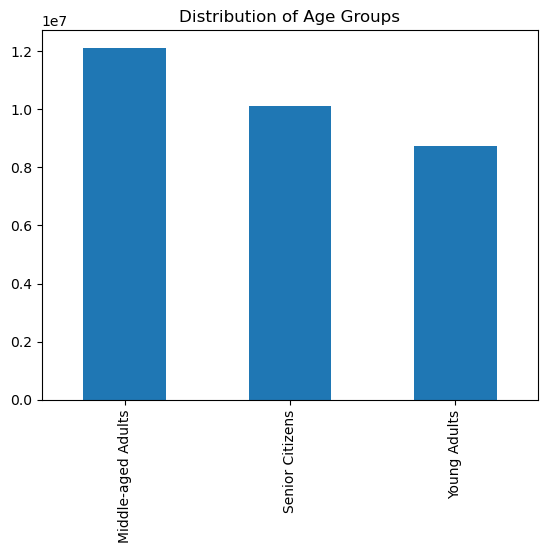

In [7]:
# Creating bar chart for 'age_category' 
bar_age_category = df_merged['age_category'].value_counts().sort_index().plot.bar()
plt.title('Distribution of Age Groups')

Middle-aged adults is the group with the highest counts

In [8]:
# Exporting bar chart.
bar_age_category.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_category.png'))

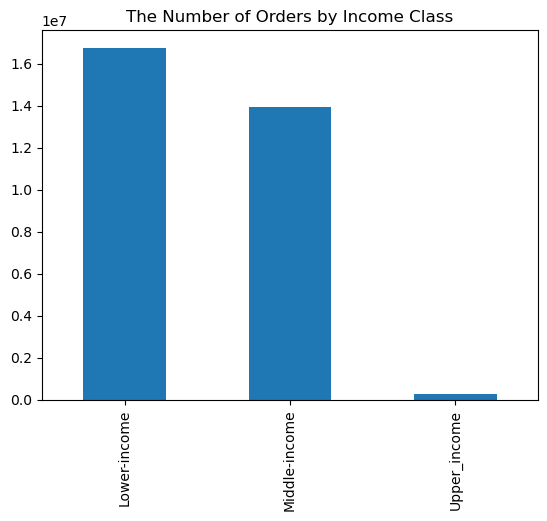

In [9]:
# Bar chart of income_class
bar_income_class = df_merged['income_class'].value_counts().plot.bar(title ='The Number of Orders by Income Class')

The low-income group has the highest number of orders.

In [10]:
# Export bar chart
bar_income_class.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_income_class'))

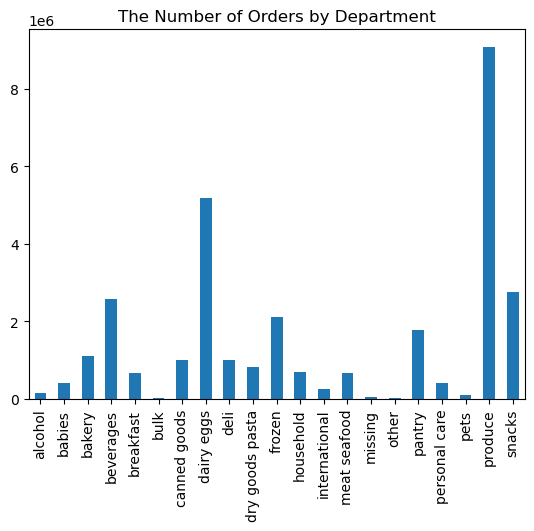

In [11]:
# Creating a bar chart for departments.
bar_department = df_merged['department'].value_counts().sort_index().plot.bar(title = 'The Number of Orders by Department')

The department 'produce has the highest number of orders. This is followed by 'dairy eggs', 'snacks' and 'beverages'. 

In [12]:
# Exporting bar chart
bar_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_departments.png'))

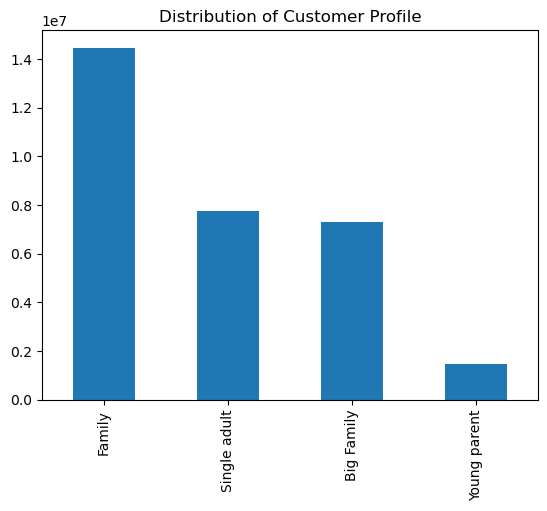

In [13]:
# Creating a bar chart for 'customer_profile'
bar_family_status = df_merged['customer_profile'].value_counts().plot.bar(title = 'Distribution of Customer Profile')

The customer profile 'Family' has the most counts. This is married people with 2 or less childern. 

In [14]:
# Exporting bar chart
bar_family_status.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_family_status.png'))

### 03. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

#### Customer age groups 

In [16]:
# Aggregate min. max. and mean on customer's 'age_category'
age_category_agg = df_merged.groupby('age_category',)[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [17]:
age_category_agg

days_since_prior_order                  prices        \
                                      min   max       mean    min   max   
age_category                                                              
Middle-aged Adults                    0.0  30.0  10.607932    1.0  25.0   
Senior Citizens                       0.0  30.0  10.587844    1.0  25.0   
Young Adults                          0.0  30.0  10.623883    1.0  25.0   

                              
                        mean  
age_category                  
Middle-aged Adults  7.790531  
Senior Citizens     7.796144  
Young Adults        7.784246

In [18]:
# Aggregate min. max. and mean on customer's 'income_class' for usage and expenditure.
income_class_agg = df_merged.groupby('income_class',)[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [19]:
income_class_agg

days_since_prior_order                  prices                
                                 min   max       mean    min   max      mean
income_class                                                                
Lower-income                     0.0  30.0  10.637147    1.0  25.0  7.652564
Middle-income                    0.0  30.0  10.580080    1.0  25.0  7.956613
Upper_income                     0.0  30.0   9.959948    1.0  25.0  7.777393

#### Dependents

In [20]:
# Aggregate min. max. and mean on customer's 'customer_profile' for usage and expenditure.
customer_profile_agg = df_merged.groupby('customer_profile',)[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [21]:
customer_profile_agg

days_since_prior_order                  prices        \
                                    min   max       mean    min   max   
customer_profile                                                        
Big Family                          0.0  30.0  10.621247    1.0  25.0   
Family                              0.0  30.0  10.612810    1.0  25.0   
Single adult                        0.0  30.0  10.588728    1.0  25.0   
Young parent                        0.0  30.0  10.552147    1.0  25.0   

                            
                      mean  
customer_profile            
Big Family        7.790888  
Family            7.789971  
Single adult      7.789550  
Young parent      7.800604

#### Departments

In [23]:
# Aggregate min. max. and mean on 'customer_profile' 
dep_cus_profile_agg = df_merged.groupby(['customer_profile', 'department'])[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [24]:
dep_cus_profile_agg

days_since_prior_order                  prices  \
                                                  min   max       mean    min   
customer_profile department                                                     
Big Family       alcohol                          0.0  30.0   9.680870    1.0   
                 babies                           0.0  30.0   9.496798    1.0   
                 bakery                           0.0  30.0  10.601082    1.0   
                 beverages                        0.0  30.0  10.613428    1.0   
                 breakfast                        0.0  30.0  10.817989    1.0   
...                                               ...   ...        ...    ...   
Young parent     pantry                           0.0  30.0  10.377727    1.0   
                 personal care                    0.0  30.0  11.064353    1.0   
                 pets                             0.0  30.0  11.147246    1.0   
                 produce                          0.0  30.0  10.388850    1.0   
                 snacks                           0.0  30.0  10.420151    1.6   

                                                
                                 max      mean  
customer_profile department                     
Big Family       alcohol        15.0  8.260335  
                 babies         15.0  7.658709  
                 bakery         15.0  7.867693  
                 beverages      15.0  7.667362  
                 breakfast      14.9  8.012552  
...                              ...       ...  
Young parent     pantry         20.0  8.016946  
                 personal care  15.0  7.938132  
                 pets           15.0  7.918097  
                 produce        15.0  8.003058  
                 snacks          7.0  4.265732  

[84 rows x 6 columns]

###  04. Compare customer profiles with regions and departments

In [25]:
# Checking the relationship between 'age_category' & 'income_class' of customers profile in differnet regions
profile_age_reg = df_merged.groupby('region')[['income_class','age_category']].value_counts().reset_index(name='count')

In [26]:
# Checking the output
profile_age_reg

,region,income_class,age_category,count
0,Midwest,Lower-income,Young Adults,1946965
1,Midwest,Middle-income,Middle-aged Adults,1638677
2,Midwest,Middle-income,Senior Citizens,1634740
3,Midwest,Lower-income,Middle-aged Adults,1219978
4,Midwest,Lower-income,Senior Citizens,694477
5,Midwest,Middle-income,Young Adults,62583
6,Midwest,Upper_income,Middle-aged Adults,27677
7,Midwest,Upper_income,Senior Citizens,27553
8,Midwest,Upper_income,Young Adults,8863
9,Northeast,Lower-income,Young Adults,1511489


In [27]:
# Checking income_class by regions
region_income = pd.crosstab(df_merged['income_class'],df_merged['region'], dropna = False)

In [28]:
region_income

region,Midwest,Northeast,South,West
income_class,,,,
Lower-income,3861420,2948201,5647194,4300347
Middle-income,3336000,2476378,4580499,3560383
Upper_income,64093,40106,83446,66497


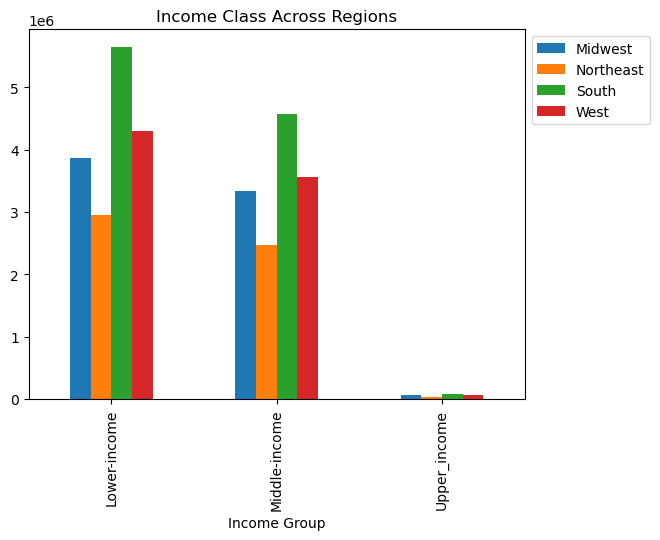

In [30]:
# Visualtization of 'income_class' and 'region'
bar_region_income = region_income.plot.bar(title = 'Income Class Across Regions')
plt.xlabel("Income Group")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

The south has the highest counts for all income classes. 

In [31]:
# Export bar chart
bar_region_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_income.png'))

In [33]:
# Piovt the data to create a stacked bar chart to see relationship between 'departments' and 'customers_profile'
customer_fam_dep = df_merged.groupby(['department', 'customer_profile']).size().unstack(fill_value=0)

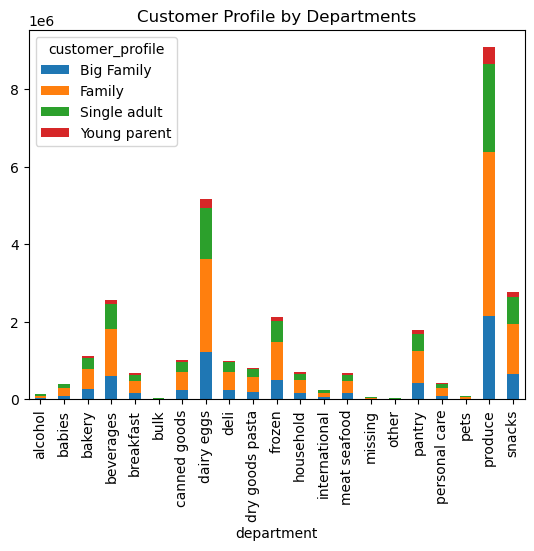

In [34]:
#stacked bar graph
stacked_cust_dept = customer_fam_dep.plot.bar(stacked = True, title = 'Customer Profile by Departments')

'produce' is the most popular department across all customer profiles. 

In [35]:
# Export stacked bar chart
stacked_cust_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_cust_dept.png'))

In [36]:
# Create a crosstab to count the occurrences of age categories in each department
cross_tab = pd.crosstab(df_merged['department'], df_merged['age_category'])

<Figure size 1200x600 with 0 Axes>

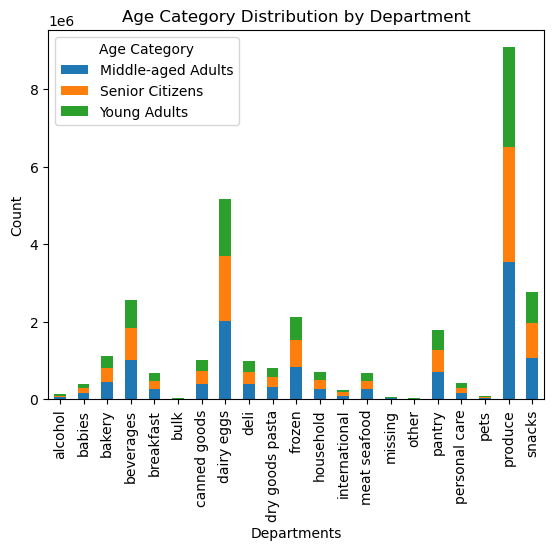

In [37]:
# Creating a clustered bar chart
plt.figure(figsize=(12, 6))
clustered_age_dept = cross_tab.plot(kind ='bar', stacked = True, title ='Age Category Distribution by Department')
plt.xlabel('Departments')
plt.ylabel('Count')
plt.legend(title ='Age Category')

'Produce' is the most popular department across all age groups. 

In [38]:
# Exporting clustered bar chart
clustered_age_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'clustered_age_dept.png',))

In [39]:
# Checking customer_profile by region
cust_by_region = pd.crosstab(df_merged['customer_profile'],df_merged['region'], dropna = False)

In [40]:
cust_by_region

region,Midwest,Northeast,South,West
customer_profile,,,,
Big Family,1671542,1291928,2425559,1895018
Family,3415720,2561845,4798190,3683909
Single adult,1822816,1354482,2581933,1980450
Young parent,351435,256430,505457,367850


Text(0.5, 1.0, 'Customer Profile Distribution by Region')

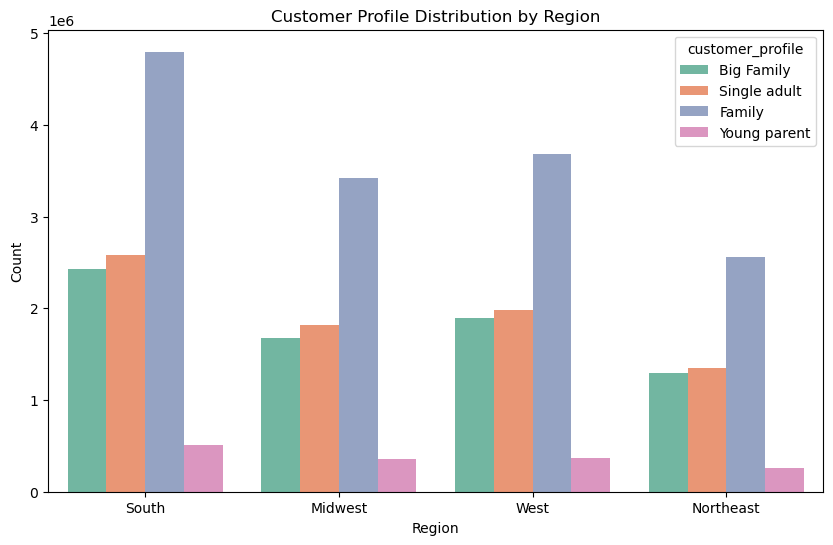

In [41]:
# Create a countplot to visualize the distribution of 'customer_profile' in each 'region'
plt.figure(figsize=(10, 6))
countplot_profile_region = sns.countplot(x='region', hue='customer_profile', data=df_merged, palette='Set2')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Customer Profile Distribution by Region')

In [42]:
# exporting Countplot bar chart
countplot_profile_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Countplot_Customer_Profile_Region_Relationship.png'))